In [1]:
import sys
import numpy as np
from astropy.io import fits
from astroscrappy import detect_cosmics
from matplotlib import pyplot as plt 
sys.path.append('aspired')

import twodspec

In [2]:
# Example data from SPRAT
# A spectrum with the host galaxy and a (super)nova(?) with only emission line
sprat_data = fits.open('examples/v_e_20190522_8_1_0_9.fits')[0].data

aspired/twodspec.py:99: RuntimeWarning: invalid value encountered in log10
  np.log10(img),


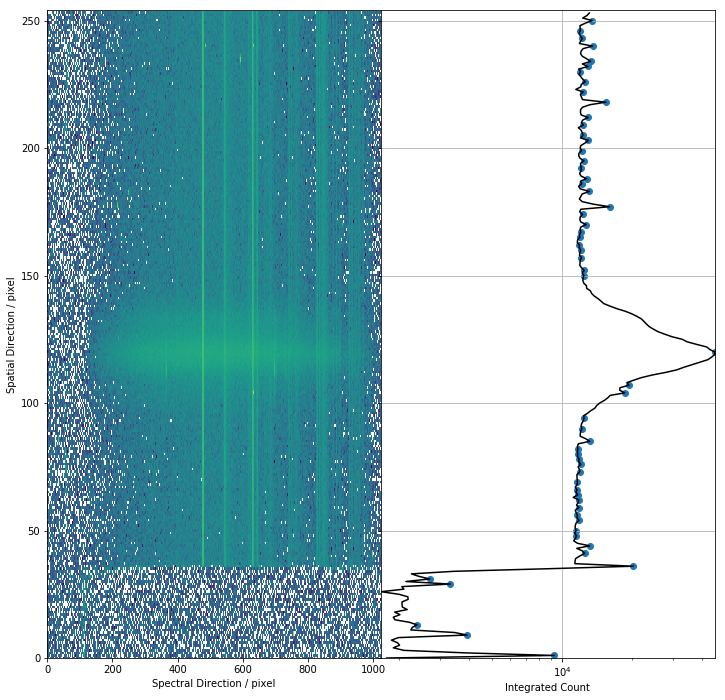

In [3]:
# (1) example of twodspec._find_peaks() without cosmic ray removal

# Set the spectral and spatial direction
Saxis = 1
Waxis = 0

# get the length in the spectral and spatial directions
spec_size = np.shape(sprat_data)[Waxis]
spatial_size = np.shape(sprat_data)[Saxis]

# the valid y-range of the chip (an array of int)
ydata = np.arange(spec_size)
ztot = np.sum(sprat_data, axis=Saxis)

peaks_y, heights_y = twodspec._find_peaks(sprat_data, spec_size, spatial_size, ydata, ztot, f_height=0.05, display=True)

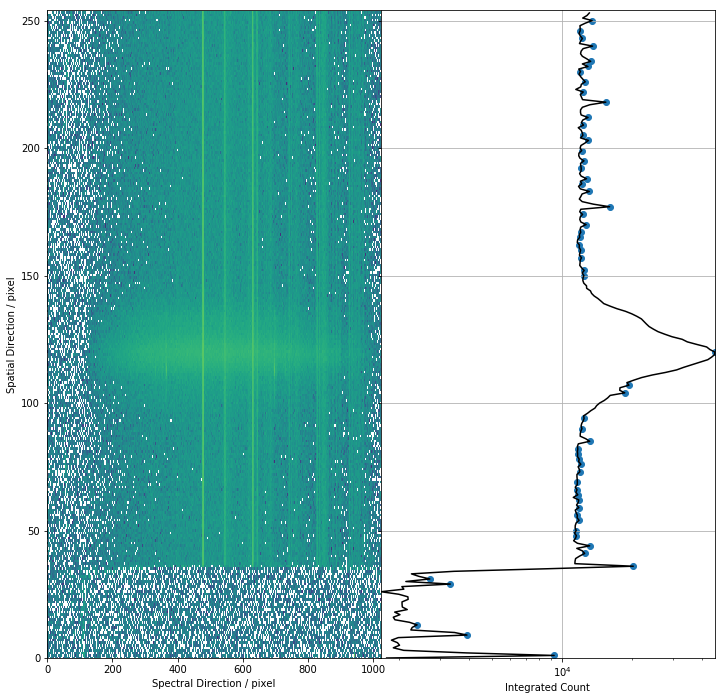

In [4]:
# (2) example of twodspec._find_peaks() with cosmic ray removal
#     Note that the CR removal keeps the emission lines
peaks_y, heights_y = twodspec._find_peaks(detect_cosmics(sprat_data)[1], spec_size, spatial_size, ydata, ztot, f_height=0.05, display=True)

Tracing Aperture using nsteps=20


aspired/twodspec.py:245: RuntimeWarning: invalid value encountered in log10
  np.log10(img),


Spectrum 1 : Trace gaussian width = [8.53727624 8.6339242  8.25123878 8.05002784 7.92324701 8.0023323
 7.59266713 7.33079212 7.37079266 7.1991363  7.11599939 7.32164597
 7.96408522 7.06339187 6.76592853 6.54909642 6.71743867 7.23236452
 5.72692861 0.        ] pixels


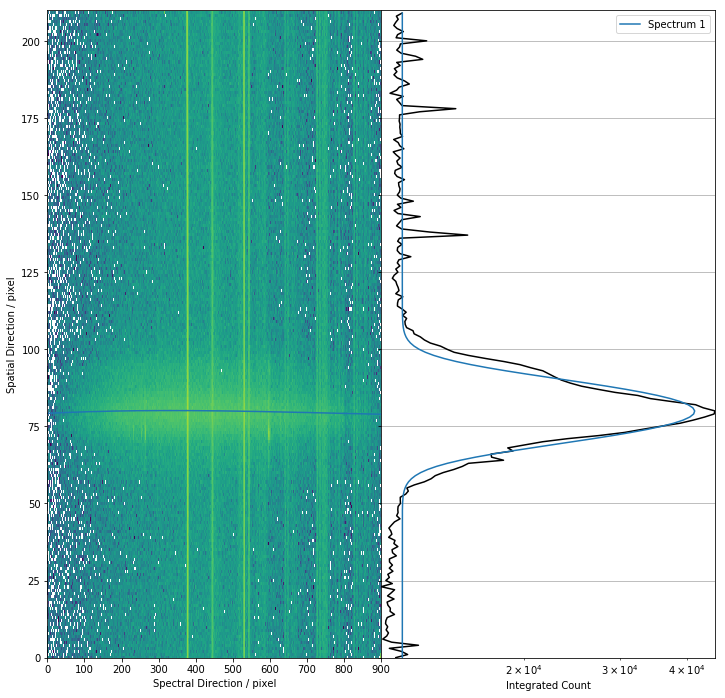

In [5]:
# (3) example of twodspec.ap_trace() with cosmic ray removal, selecting the 7 brightest spectra
#     in the pixel range covered by spatial_mask and spec_mask.
#     The emission line can be identified by the peak finding algorithm, but a continuum cannot
#     be traced because there is not one! The row number of the orange gaussian can be noted
#     and use it for aperture extraction.

spatial_mask = np.arange(40,250)
spec_mask = np.arange(100,1000)

my, my_sigma = twodspec.ap_trace(sprat_data, nsteps=20, spatial_mask=spatial_mask, spec_mask=spec_mask,
                                cosmic=True, n_spec=1, recenter=False, prevtrace=(0, ), bigbox=8, Saxis=1,
                                nomessage=False, display=True)

aspired/twodspec.py:539: RuntimeWarning: invalid value encountered in log10
  min(median_trace+widthup+skysep+skywidth, len(img[0])), :]),


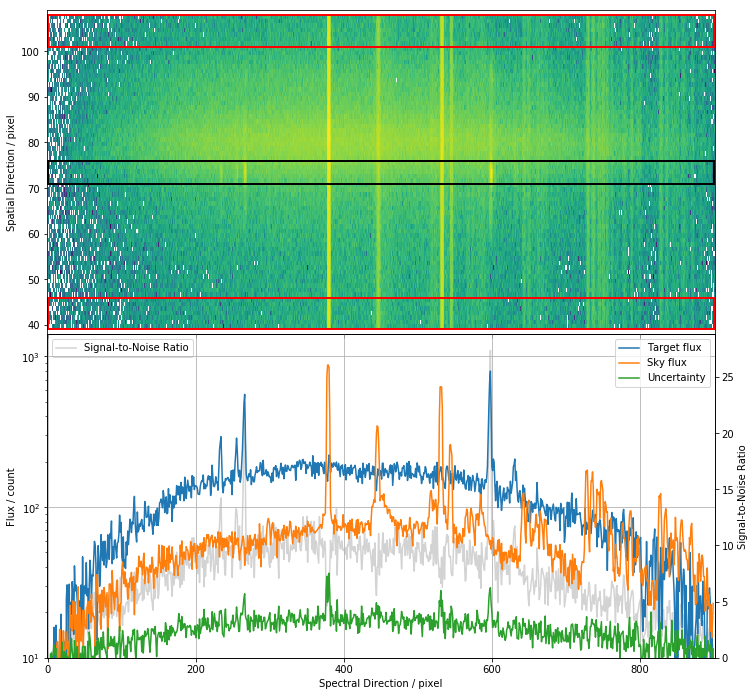

In [6]:
# Spectrum with only emission lines a special case where the continuum cannot be traced.
# Users have to supply row numbers.
spec_ap, sky_ap, err_ap = twodspec.ap_extract(
    sprat_data,
    np.ones(len(spec_mask))*74.,
    np.ones(len(spec_mask))*3.,
    spatial_mask=spatial_mask,
    spec_mask=spec_mask,
    apwidth=2,
    skysep=25,
    display=True,
    optimal=False)

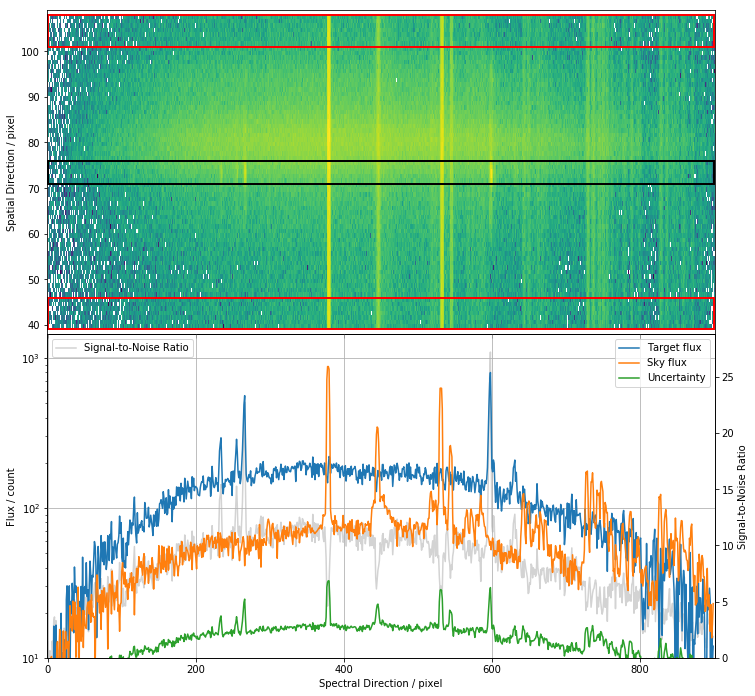

In [7]:
# Optimal extraction
spec_op, sky_op, err_op = twodspec.ap_extract(
    sprat_data,
    np.ones(len(spec_mask))*74.,
    np.ones(len(spec_mask))*3.,
    spatial_mask=spatial_mask,
    spec_mask=spec_mask,
    apwidth=2,
    skysep=25,
    display=True)

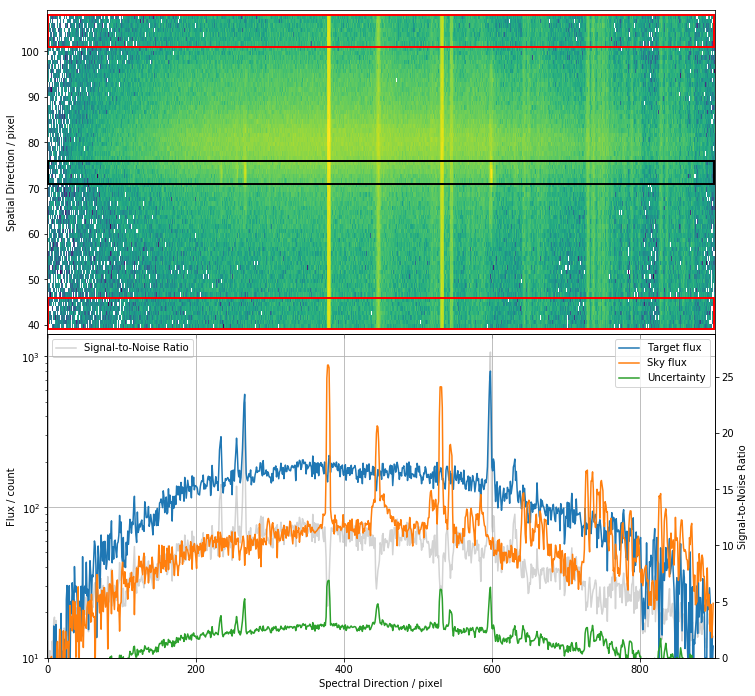

In [8]:
# Optimal extraction with sky fit
spec_skyfit, sky_skyfit, err_skyfit = twodspec.ap_extract(
    sprat_data,
    np.ones(len(spec_mask))*74.,
    np.ones(len(spec_mask))*3.,
    spatial_mask=spatial_mask,
    spec_mask=spec_mask,
    apwidth=2,
    skysep=25,
    skydeg=1,
    display=True)

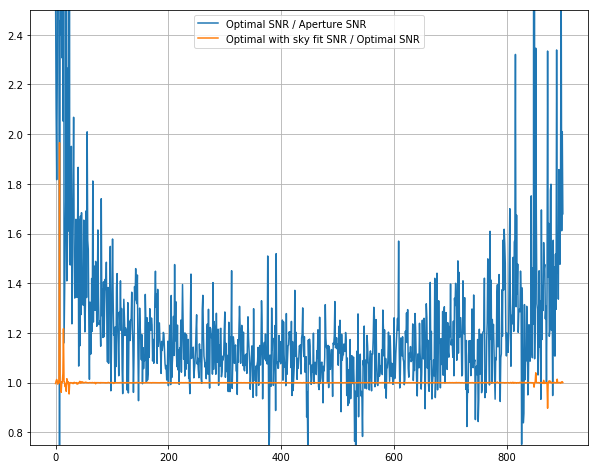

In [9]:
plt.figure(figsize=(10,8))
plt.plot((spec_op/err_op)/(spec_ap/err_ap), label='Optimal SNR / Aperture SNR')
plt.plot((spec_skyfit/err_skyfit)/(spec_op/err_op), label='Optimal with sky fit SNR / Optimal SNR')
plt.ylim(0.75,2.5)
plt.grid()
plt.legend()
